In [ ]:
# mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics
import xgboost as xgb
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [ ]:
# reading the training set
train = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/train.csv')

train.head()

,news,source,label
0,ಈ ವ್ಯಕ್ತಿ ಪ್ರೌಢಶಾಲೆಯಲ್ಲಿ 26 ಬಾರಿ ಫೇಲ್ ಆಗಿದ್ದಾನೆ,oneindia,0
1,ಸರ್ಕಾರದ ಜೊತೆ ಉದ್ಧವ್ ಠಾಕ್ರೆಯ ಪಕ್ಷವನ್ನೂ ವಶಪಡಿಸ್ಕ...,asianet,1
2,ಹುಲಿ ಸಂರಕ್ಷಿತ ಪ್ರದೇಶ ಘೋಷಣೆ ಸಿಎಂ ನಿರ್ಧಾರಕ್ಕೆ ಉಮ...,prajavani,1
3,108 ಗಂಟೆಯಲ್ಲಿ 75 ಕಿಮೀ ರಸ್ತೆ ನಿರ್ಮಾಣದ ಗುರಿ ಗಿನ್...,asianet,1
4,ಬಾಳಾಠಾಕ್ರೆ ತಿಲಕ ಇಡುತ್ತಿರುವುದು ಏಕನಾಥ್ ಶಿಂಧೆಗಲ್...,asianet,0


In [ ]:
# reading the testing set
test = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/test.csv')
test.head()

In [ ]:
# removing the null rows
train = train.dropna()
test = test.dropna()

In [ ]:
# printing the shape of the training and the testing set
print(train.shape, test.shape)

(2299, 3) (500, 3)


In [ ]:
# splitting the datasets into dependent and independent variables
X_train = train.news.values
y_train = train.label.values
X_test = test.news.values
y_test = test.label.values

In [ ]:
# converting the news headlines into word vectors using TF-IDF
vectoriser = TfidfVectorizer()
X_train = vectoriser.fit_transform(X_train)
X_test = vectoriser.transform(X_test)
X_train

<2299x2021 sparse matrix of type '<class 'numpy.float64'>'
	with 14267 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
# creating a XGBoost classifier
model = xgb.XGBClassifier(max_depth = 12, subsample = 0.33, objective = 'binary:logistic', n_estimators = 500, learning_rate = 0.01)
eval_set = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train.ravel(), early_stopping_rounds = 15, eval_metric = ['error', 'logloss'], eval_set = eval_set, verbose = True)

[0]	validation_0-error:0.281862	validation_0-logloss:0.690575	validation_1-error:0.336	validation_1-logloss:0.69121
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.260983	validation_0-logloss:0.687679	validation_1-error:0.346	validation_1-logloss:0.689163
[2]	validation_0-error:0.259678	validation_0-logloss:0.684954	validation_1-error:0.334	validation_1-logloss:0.686983
[3]	validation_0-error:0.247934	validation_0-logloss:0.682049	validation_1-error:0.322	validation_1-logloss:0.68494
[4]	validation_0-error:0.253154	validation_0-logloss:0.679412	validation_1-error:0.32	validation_1-logloss:0.682888
[5]	validation_0-error:0.249674	validation_0-logloss:0.676724	validation_1-error:0.312	validation_1-logloss:0.680758
[6]	validation_0-error:0.250979	validation_0-logloss:0.674219	validation_1-error:0.312	validation_1-logloss:0.678906
[7]	validation_0-er

XGBClassifier(learning_rate=0.01, max_depth=12, n_estimators=500,
              subsample=0.33)

In [ ]:
# making predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluating predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.80%


In [ ]:
# printing the classification report of the XGBoost model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.38      0.51       200
           1       0.69      0.93      0.79       300

    accuracy                           0.71       500
   macro avg       0.73      0.65      0.65       500
weighted avg       0.73      0.71      0.68       500



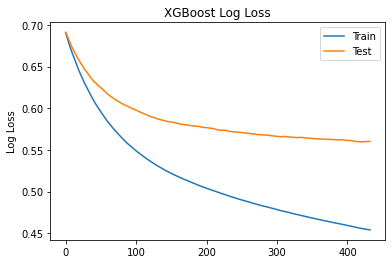

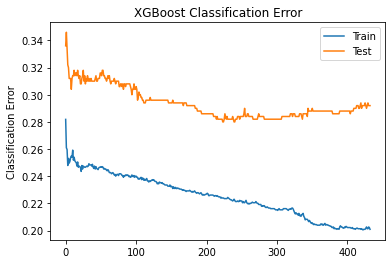

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
# displaying the confusion matrix for the XGBoost model
print(confusion_matrix(y_test,predictions))

[[ 76 124]
 [ 22 278]]
